# 2D CA in Python:

### all updates are done simultaneously i.e, at the same time

### order is not important. Just need go to the next state for all at the same time.

In [1]:
CA=[[1,2,3],[4,5,6],[7,8,9]]

In [2]:
for i1,l1 in enumerate(CA):
    print(i1,"##",l1)

0 ## [1, 2, 3]
1 ## [4, 5, 6]
2 ## [7, 8, 9]


In [3]:
for i1,l1 in enumerate(CA):
    for i2,l2 in enumerate(CA[i1]):
        print(l2,end=' ')
    print()


1 2 3 
4 5 6 
7 8 9 


### Emergence: is the process where larger patterns arise through interactions among smaller entities that themselves do not exhibit such properties.

## HomeWork from slides

In [4]:
# to make a Cellular Automata max 2D
def makeCA(width=1, height=1, defaultValue=0):
    CA = []
    for row in range(height):
        CA.append([defaultValue]*width)
    return CA

In [5]:
#to randomise the cellular automata with 1 or 0 as values
def randomise(CA):
    import random
    for row in range(len(CA)):
        for col in range(len(CA[row])):
            CA[row][col] = random.randint(0,1)
    return CA

In [6]:
makeCA(3,2)

[[0, 0, 0], [0, 0, 0]]

In [7]:
randomise(makeCA(3,2))

[[1, 0, 0], [0, 0, 0]]

In [8]:
#finds the state of top, right, bottom and left neighbours for a given cell
def get4Neighbours(i,j,myCA):
    neighbour = []
    if i>0:
        neighbour.append(myCA[i-1][j])
    if j<len(myCA[i])-1:
        neighbour.append(myCA[i][j+1])
    if i<len(myCA[j])-1:
        neighbour.append(myCA[i+1][j])
    if j>0:
        neighbour.append(myCA[i][j-1])
        
    return neighbour

In [9]:
# gets the state of the neighbours of the cell located in the position ith row and jth column
def nextState(neighbours):
    count = 0
    for neighbour in neighbours:
        count += neighbour
    if count<2:
        return 0
    return 1
        

In [10]:
#def update(CA):
    temp = makeCA(len(CA), len(CA[0]))
    for row in range(len(CA)):
        for cell in range(len(CA[row])):
            temp[row][cell]= nextState(get4Neighbours(row,cell,CA))
    #needs deep copy
    print(temp)
    return temp

In [16]:
def update(CA):
    temp = makeCA(len(CA), len(CA[0]))
    for row in range(len(CA)):
        for cell in range(len(CA[row])):
            temp[row][cell]= nextState(get4Neighbours(row,cell,CA))
    #needs deep copy
    #print(temp)
    for row in range(len(CA)):
        for cell in range(len(CA[row])):
            CA[row][cell] = temp[row][cell]
    return

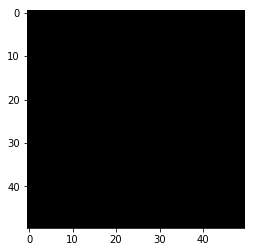

In [31]:
# for visualising the Emergence:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
myCA = makeCA(50,50)
randomise(myCA)
#myCA[1][1]=1
for i in range(30):
    update(myCA)
    #print(myCA)
    #print('**********')
    #print(myCA)

plt.imshow(np.array(myCA, dtype=int), cmap='gray')
